In [1]:
from triangulation import show_triangulation
from neighbors import neighbors_dict

In [2]:
# def show_trangulation(file_path, title, points=[], project_down=3, display_zoom=2):
#     """
#     :project_down: the dimension where you look down.
#     """
#     if project_down == 3:
#         indice = range(1, 3)
#     elif project_down == 2:
#         indice = [1, 3]
#     elif project_down == 1:
#         indice = [2, 3]
    
        
#     r = Rotation.from_euler('x', 10, degrees=True)
#     theta = np.radians(10)
#     c, s = np.cos(theta), np.sin(theta)
#     R = np.array(((1, 0), (0, 1.1)))
#     R_inv = R.inv
    
#     if len(points) == 0:
#         points = de_dup(pd.read_csv(file_path).to_numpy())[:, 1:]
#         points = points[:, [i - 1 for i in indice]]
#     else:
#         points = de_dup(points)
#         points = points[:, [i - 1 for i in indice]]

    
#     points = points.dot(R)
#     tri = Delaunay(points)
#     points = points.dot(R_inv)
#     plt.triplot(points[:,0], points[:,1], tri.simplices)
#     fig = plt.gcf()
#     w, h = fig.get_size_inches()
#     fig.set_size_inches(w * display_zoom, h * display_zoom)
#     plt.gca().set_aspect('equal', adjustable='box')
    
#     plt.plot(points[:,0], points[:,1], 'o')
   
#     plt.title(title)
#     plt.show()

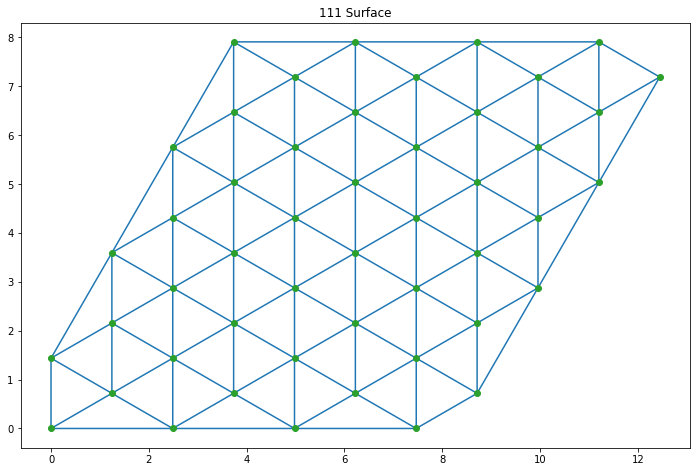

In [4]:
tri, points = show_triangulation("poscar_files/POSCAR_Ni_111", title="111 Surface")

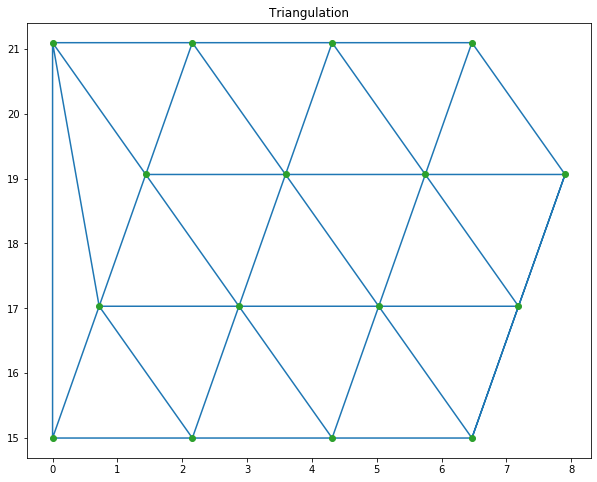

In [5]:
tri, points = show_triangulation("poscar_files/POSCAR_Ni_111","111 Surface Side View", project_down="x")

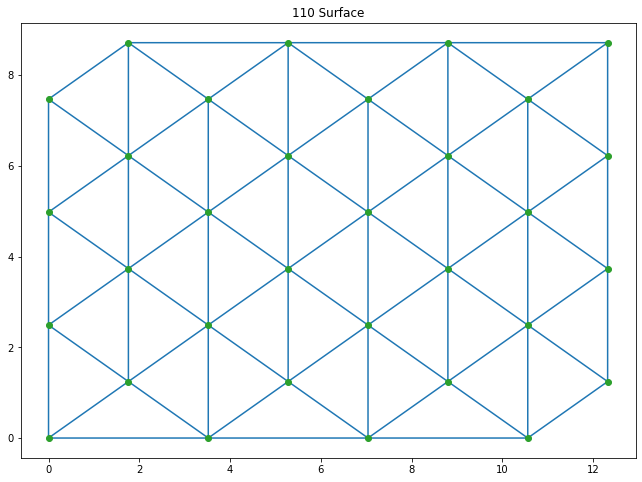

In [6]:
tri, points = show_triangulation("poscar_files/POSCAR_Ni_110", title="110 Surface")

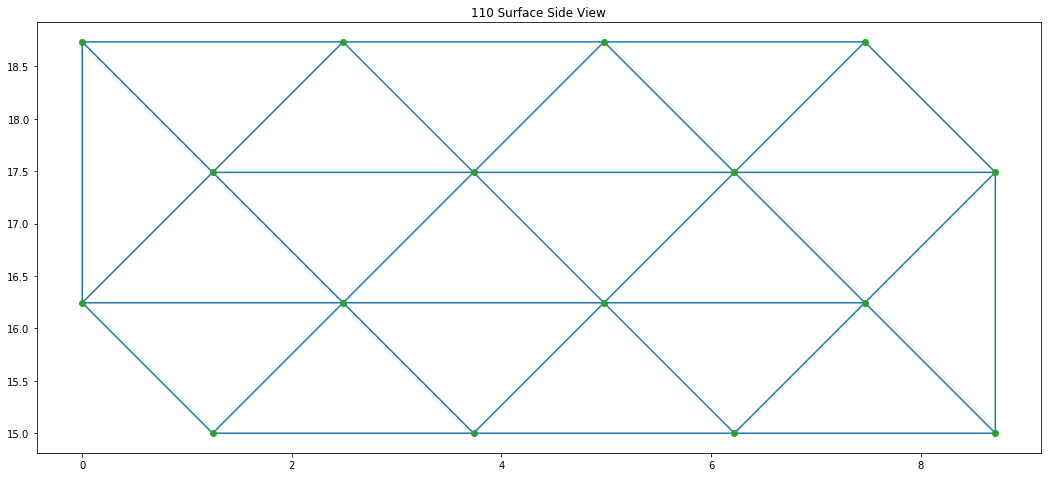

In [2]:
tri, points = show_triangulation("poscar_files/POSCAR_Ni_110", title="110 Surface Side View", project_down="x", display_zoom=3)

## Using Supercells

In [7]:
import ase.io.vasp
import pymatgen
from pymatgen.io.ase import AseAtomsAdaptor
import pymatgen.vis.structure_chemview as structure_chemview
from ase.visualize import view

In [8]:
cell = ase.io.vasp.read_vasp("poscar_files/POSCAR_Ni_110")
super_cell = cell*(3,3,3)
# ase.io.vasp.write_vasp("POSCAR.4x4x4",cell*(4,4,4), label='444supercell',direct=True,sort=True)

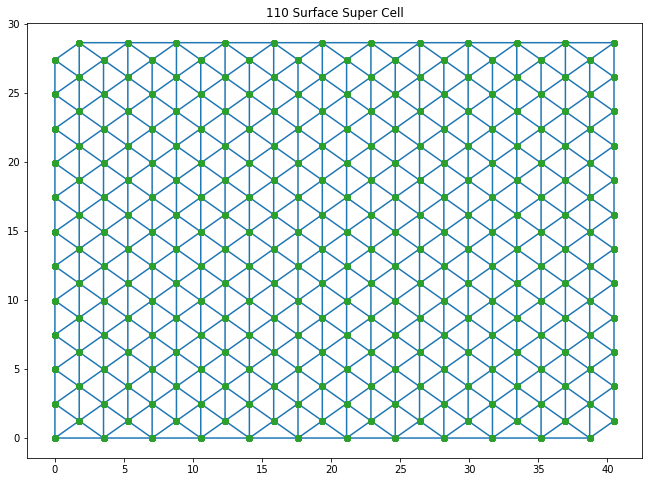

In [14]:
show_triangulation(points=super_cell.get_positions(), title="110 Surface Super Cell", project_down="z")

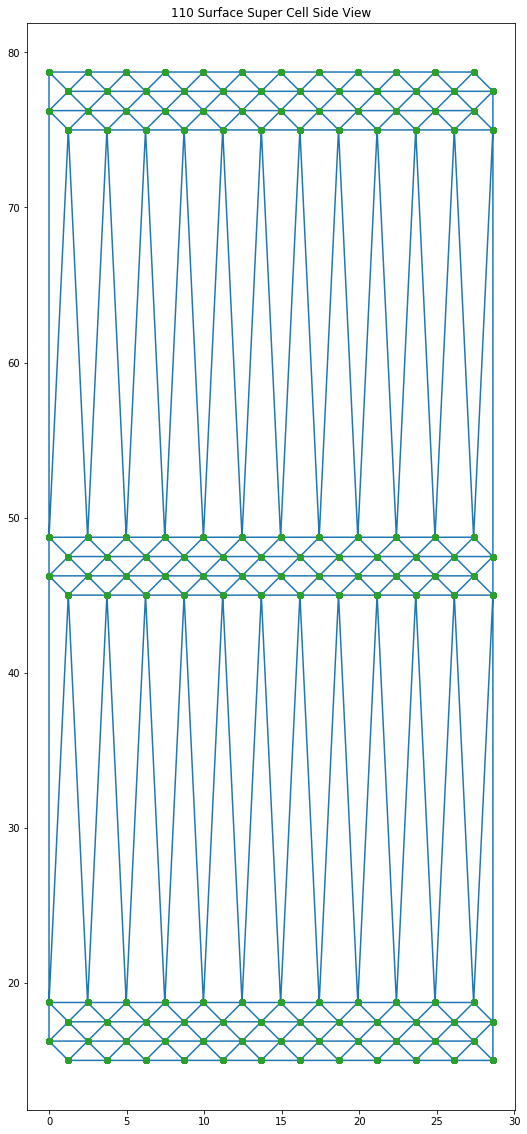

In [16]:
show_triangulation(points=super_cell.get_positions(), title="110 Surface Super Cell Side View", project_down="x", display_zoom=5)

In [9]:
# Use ase
view(super_cell)

In [12]:
viewer = structure_chemview.quick_view(AseAtomsAdaptor.get_structure(super_cell))

In [21]:
viewer.lines()
from IPython.display import display

In [22]:
display(viewer)

MolecularViewer(height=500, width=500)

In [12]:
from chemview import MolecularViewer
import numpy as np
coordinates = np.array([[0.00, 0.13, 0.00], [0.12, 0.07, 0.00], [0.12,-0.07, 0.00],
                       [0.00,-0.14, 0.00], [-0.12,-0.07, 0.00],[-0.12, 0.07, 0.00],
                       [ 0.00, 0.24, 0.00], [ 0.21, 0.12, 0.00], [ 0.21,-0.12, 0.00],
                       [ 0.00,-0.24, 0.00], [-0.21,-0.12, 0.00],[-0.21, 0.12, 0.00]])
atomic_types = ['C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H']
bonds = [(0, 6), (1, 7), (2, 8), (3, 9), (4, 10), (5, 11),
         (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0)]

In [23]:
mv = MolecularViewer(coordinates, topology={'atom_types': atomic_types,
                                            'bonds': bonds})
mv

MolecularViewer(height=500, width=500)

In [25]:
mv.camera_str

''

In [13]:
len(coordinates)

12

In [17]:
for p in coordinates:
    print(len(p))

3
3
3
3
3
3
3
3
3
3
3
3
